## **EJEMPLO DE RECONOCIMIENTO DE IMAGENES DE PRENDAS**

In [9]:
# Cargando librerias

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense,Flatten


### *Fuente de datos*

In [ ]:
F_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = F_mnist.load_data()
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

*Visualizacion de los Items*

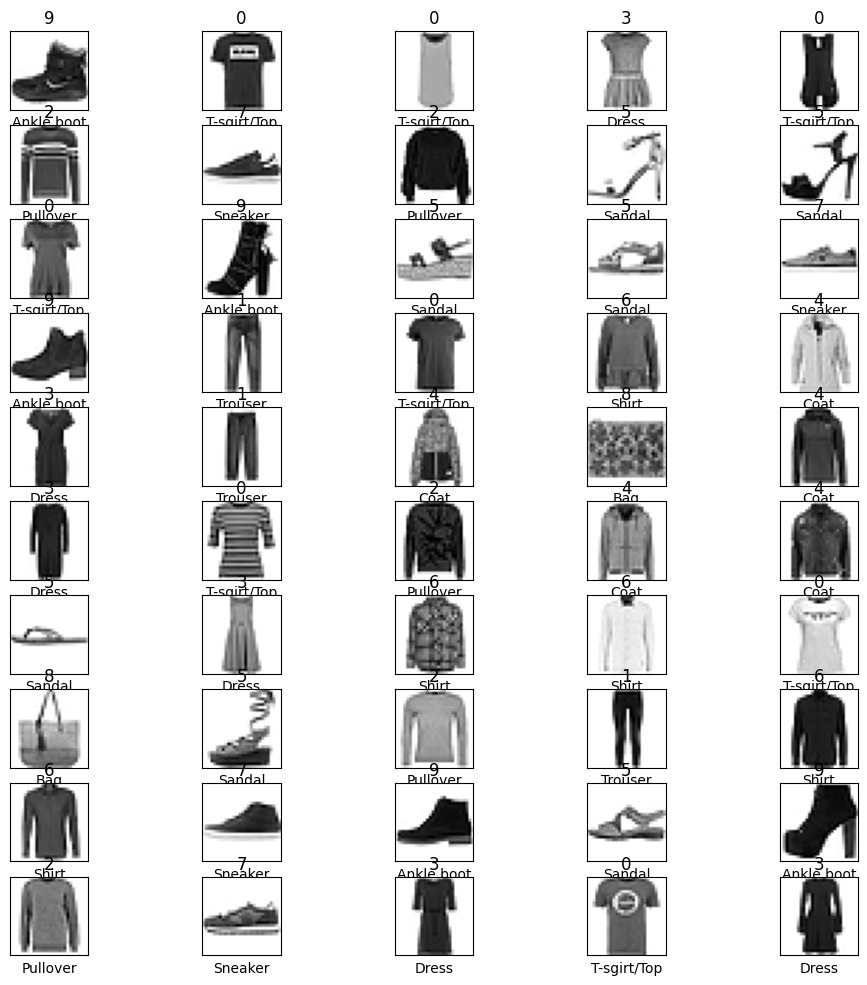

In [8]:
plt.figure(figsize=(12,12))

for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(y_train[i])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### *Preprocesamiento*

In [6]:
# Se convierte el tipo de dato de las imagenes

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Se escalan los valores de las imagenes a un rango de 0 a 1
x_train=x_train/255
x_test=x_test/255

# Se verifican tamaños de los arreglos

print('Dimensiones del arreglo de entrenamiento: ',x_train.shape)
print('Dimensiones del arreglo de prueba: ',x_test.shape)
print('Longitud vector de etiquetas en el set de entrenamiento: ',len(y_train))
print('Longitud vector de etiquetas en el set de prueba: ',len(y_test))

Dimensiones del arreglo de entrenamiento:  (60000, 28, 28)
Dimensiones del arreglo de prueba:  (10000, 28, 28)
Longitud vector de etiquetas en el set de entrenamiento:  60000
Longitud vector de etiquetas en el set de prueba:  10000


### *Definición del modelo*

In [10]:
# Declaración del primer modelo


Modelo_02=Sequential()
Modelo_02.add(Flatten(input_shape=(28,28)))
Modelo_02.add(Dense(10,activation='sigmoid'))
Modelo_02.add(Dense(10,activation='softmax'))

Modelo_02.summary()

C:\Users\Fernando\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"
┌──────────────────────────────────────┬─────────────────────────────┬─────────────────┐
│ Layer (type)                         │ Output Shape                │         Param # │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘
 Total params: 7,960 (31.09 KB)
 Trainable params: 7,960 (31.09 KB)
 Non-trainable params: 0 (0.00 B)


### *Configuracion del modelo*

In [19]:
# sgd: Stochastic gradient descent
Modelo_02.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### *Entrenamiento y Evaluacion*

In [20]:
Modelo_02.fit(x_train,y_train,epochs=5)

test_loss, test_acc = Modelo_02.evaluate(x_test,  y_test, verbose=2)

print('\nPrecision del modelo:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6983 - loss: 0.7879
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7045 - loss: 0.7559
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7024 - loss: 0.7842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7190 - loss: 0.7519
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7142 - loss: 0.7834
313/313 - 1s - 2ms/step - accuracy: 0.6976 - loss: 0.7770

Precision del modelo: 0.6976000070571899


### *Predicciones del modelo*

In [21]:
# Se calculan los valores predichos por el modelo
Predicciones=Modelo_02.predict(x_test)

# Un valor en particular

i=8
print('Predicción: ',class_names[np.argmax(Predicciones[i])])
print('Etiqueta verdadera: ',class_names[y_test[i]])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicción:  Sneaker
Etiqueta verdadera:  Sandal
